In [1]:
import pandas as pd
import numpy as np

**Data Cleaning**

In [2]:
import pandas as pd
import numpy as np
# Read the dataset into a pandas DataFrame
df = pd.read_csv('/content/dataanaltyics.csv')
# Data Cleaning
# Replace any '?' values with NaN
df = df.replace('?', np.nan)
# Remove columns with a high percentage of missing values
missing_value_threshold = 0.5 # Set the threshold for missing values
df = df.dropna(thresh=len(df) * missing_value_threshold, axis=1)
# Remove rows with missing values
df = df.dropna()
# Convert relevant columns to the appropriate data types
# For example, if 'i1_dep_1_p' and 'i1_dep_1_e' columns represent timestamps
df['i1_dep_1_p'] = pd.to_datetime(df['i1_dep_1_p'])
df['i1_dep_1_e'] = pd.to_datetime(df['i1_dep_1_e'])
# Perform any other necessary data cleaning operations
# Print the cleaned DataFrame
print(df.head())

   nr  i1_legid  i1_rcs_p  i1_rcs_e                    i1_dep_1_p  \
0   0      5182       199       218 1970-01-01 00:00:00.000000210   
1   1      6523       844       584 1970-01-01 00:00:00.000000090   
5   5      9889       181        98 1970-01-01 00:00:00.000000240   
6   6      3997      1300       212 1970-01-01 00:00:00.000000240   
7   7      7125       139        87 1970-01-01 00:00:00.000000240   

                     i1_dep_1_e  i1_dep_1_place  i1_rcf_1_p  i1_rcf_1_e  \
0 1970-01-01 00:00:00.000000215             609         935         736   
1 1970-01-01 00:00:00.000000297             700        1935        1415   
5 1970-01-01 00:00:00.000000259             815         215         223   
6 1970-01-01 00:00:00.000001267             815         270         135   
7 1970-01-01 00:00:00.000000232             783         255         154   

   i1_rcf_1_place  ...  o_dep_1_p  o_dep_1_e  o_dep_1_place o_rcf_1_p  \
0             256  ...        240       2865            256  

In [3]:
# Display the cleaned DataFrame
print(df)

        nr  i1_legid  i1_rcs_p  i1_rcs_e                    i1_dep_1_p  \
0        0      5182       199       218 1970-01-01 00:00:00.000000210   
1        1      6523       844       584 1970-01-01 00:00:00.000000090   
5        5      9889       181        98 1970-01-01 00:00:00.000000240   
6        6      3997      1300       212 1970-01-01 00:00:00.000000240   
7        7      7125       139        87 1970-01-01 00:00:00.000000240   
...    ...       ...       ...       ...                           ...   
3935  3936      9814       675       113 1970-01-01 00:00:00.000000240   
3936  3937      2163      4772      3941 1970-01-01 00:00:00.000000090   
3937  3938      4166       703       360 1970-01-01 00:00:00.000000210   
3938  3939      4225       122        19 1970-01-01 00:00:00.000000240   
3941  3942      6472      2692      1856 1970-01-01 00:00:00.000000090   

                        i1_dep_1_e  i1_dep_1_place  i1_rcf_1_p  i1_rcf_1_e  \
0    1970-01-01 00:00:00.00000021

In [4]:
df.head()

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,...,o_dep_1_p,o_dep_1_e,o_dep_1_place,o_rcf_1_p,o_rcf_1_e,o_rcf_1_place,o_dlv_p,o_dlv_e,o_hops,legs
0,0,5182,199,218,1970-01-01 00:00:00.000000210,1970-01-01 00:00:00.000000215,609,935,736,256,...,240,2865,256,1330,1265,411,780,434,1,2
1,1,6523,844,584,1970-01-01 00:00:00.000000090,1970-01-01 00:00:00.000000297,700,1935,1415,431,...,300,286,431,835,526,256,3870,445,1,2
5,5,9889,181,98,1970-01-01 00:00:00.000000240,1970-01-01 00:00:00.000000259,815,215,223,128,...,240,308,128,960,682,597,3960,467,1,2
6,6,3997,1300,212,1970-01-01 00:00:00.000000240,1970-01-01 00:00:00.000001267,815,270,135,391,...,570,763,391,80,79,281,2880,151,1,3
7,7,7125,139,87,1970-01-01 00:00:00.000000240,1970-01-01 00:00:00.000000232,783,255,154,815,...,240,298,128,960,678,597,3960,161,1,2


**Feature Extraction**

In [8]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel 
 
# Load the dataset 
df = pd.read_csv('/content/dataanaltyics.csv', na_values='?') 
 
# Separate the features and target variable 
X = df.drop('legs', axis=1) 
y = df['legs'] 
 
# Calculate the correlation matrix 
correlation_matrix = X.corr() 
 
# Identify highly correlated features 
correlated_features = set() 
for i in range(len(correlation_matrix.columns)): 
    for j in range(i): 
        if abs(correlation_matrix.iloc[i, j]) > 0.8: 
            colname = correlation_matrix.columns[i] 
            correlated_features.add(colname) 
 
# Remove highly correlated features 
X_filtered = X.drop(correlated_features, axis=1) 
 
# Handle missing values 
X_filtered = X_filtered.fillna(X_filtered.mean()) 
 
# Perform feature selection using Random Forest 
clf = RandomForestClassifier() 
clf.fit(X_filtered, y) 
importances = clf.feature_importances_ 
 
# Select features based on importance scores 
sfm = SelectFromModel(clf, threshold=0.05) 
X_selected = sfm.fit_transform(X_filtered, y) 
 
# Get the selected feature names 
selected_feature_names = X_filtered.columns[sfm.get_support()] 
 
# Print the selected feature names 
print("Selected Features:") 
print(selected_feature_names)

Selected Features:
Index(['i2_rcs_p', 'i2_dlv_p', 'i2_dlv_e', 'i2_hops', 'i3_rcs_p', 'i3_dep_1_p',
       'i3_dlv_e', 'i3_hops'],
      dtype='object')


In [10]:
import pandas as pd
# Load the dataset
df = pd.read_csv('/content/dataanaltyics.csv', na_values='?')
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                     nr  i1_legid  i1_rcs_p  i1_rcs_e  i1_dep_1_p  i1_dep_1_e  \
nr             1.000000  0.054137 -0.006139 -0.008626    0.007932    0.018017   
i1_legid       0.054137  1.000000 -0.003380 -0.008755    0.018778    0.033006   
i1_rcs_p      -0.006139 -0.003380  1.000000  0.988858   -0.078617    0.241439   
i1_rcs_e      -0.008626 -0.008755  0.988858  1.000000   -0.076069    0.107503   
i1_dep_1_p     0.007932  0.018778 -0.078617 -0.076069    1.000000    0.158433   
...                 ...       ...       ...       ...         ...         ...   
o_rcf_3_place  0.479067 -0.076251 -0.136205 -0.144712   -0.055544   -0.036686   
o_dlv_p       -0.020900 -0.019664 -0.058037 -0.051846   -0.083094   -0.072158   
o_dlv_e        0.036480 -0.008983 -0.001311 -0.001448    0.005689    0.004024   
o_hops         0.207686  0.028632 -0.053237 -0.052053    0.062599   -0.010344   
legs          -0.020506 -0.000270 -0.010434 -0.015600    0.005128    0.029478   

       

**Feature Elimination**

In [14]:
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import RFE 
from sklearn.impute import SimpleImputer 
 
# Load the dataset 
df = pd.read_csv('/content/dataanaltyics.csv') 
 
# Replace '?' with NaN 
df.replace('?', pd.NA, inplace=True) 
 
# Convert columns to numeric 
df = df.apply(pd.to_numeric, errors='ignore') 
 
# Separate the features and target variable 
X = df.drop('legs', axis=1) 
y = df['legs'] 
 
# Handle missing values using SimpleImputer 
imputer = SimpleImputer() 
X_imputed = imputer.fit_transform(X) 
 
# Create a Random Forest classifier 
clf = RandomForestClassifier() 
 
# Perform feature elimination using RFE 
rfe = RFE(estimator=clf, n_features_to_select=5)  # Select top 5 features 
X_selected = rfe.fit_transform(X_imputed, y) 
 
# Get the selected feature names 
selected_feature_names = X.columns[rfe.support_] 
 
# Print the selected feature names 
print("Selected Features:") 
print(selected_feature_names)

Selected Features:
Index(['i2_rcs_p', 'i2_rcs_e', 'i3_rcs_p', 'i3_rcs_e', 'i3_dlv_e'], dtype='object')


**Root Node**

In [16]:
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier 
import numpy as np 
 
# Load the dataset 
df = pd.read_csv('/content/dataanaltyics.csv', na_values='?') 
 
# Replace remaining missing values with NaN 
df.replace('?', np.nan, inplace=True) 
 
# Separate the features and target variable 
X = df.drop('legs', axis=1) 
y = df['legs'] 
 
# Initialize the Random Forest classifier 
clf = RandomForestClassifier() 
 
# Fill missing values with the mean of each column 
X.fillna(X.mean(), inplace=True) 
 
# Fit the classifier on the data 
clf.fit(X, y) 
 
# Get feature importance scores 
importance_scores = clf.feature_importances_ 
 
# Find the index of the most important feature (root node) 
root_node_index = importance_scores.argmax() 
 
# Get the name of the most important feature 
root_node_feature = X.columns[root_node_index] 
 
# Print the most important feature 
print("Root Node Feature:") 
print(root_node_feature)

Root Node Feature:
i3_rcs_e


**VISUALIZATION**

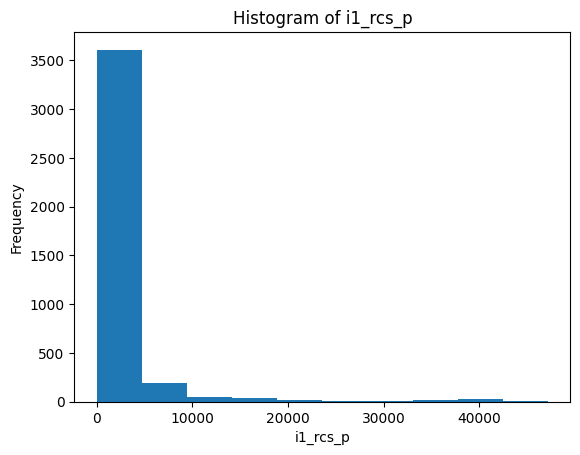

In [17]:
import matplotlib.pyplot as plt
# Select a numerical variable to plot the histogram
numerical_variable = 'i1_rcs_p'
plt.hist(df[numerical_variable], bins=10)
plt.xlabel(numerical_variable)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(numerical_variable))
plt.show()

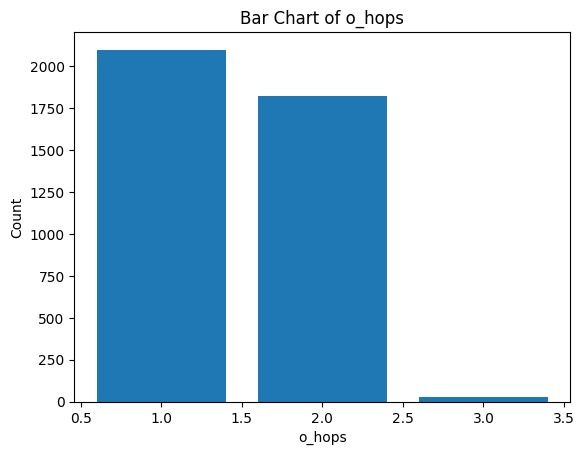

In [18]:
import matplotlib.pyplot as plt
# Select a categorical variable to plot the bar chart
categorical_variable = 'o_hops'
value_counts = df[categorical_variable].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel(categorical_variable)
plt.ylabel('Count')
plt.title('Bar Chart of {}'.format(categorical_variable))
plt.show()

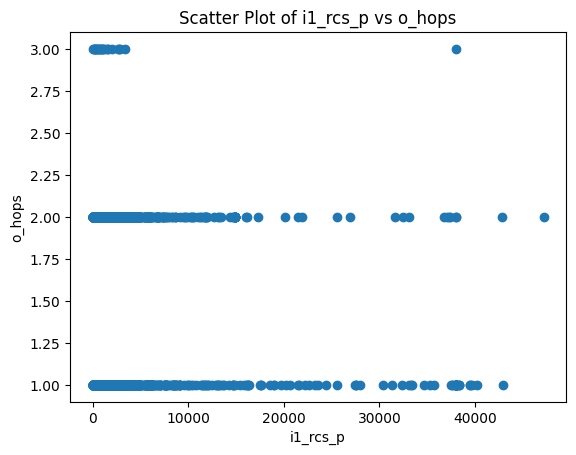

In [19]:
import matplotlib.pyplot as plt
# Select two numerical variables to plot the scatter plot
x_variable = 'i1_rcs_p'
y_variable = 'o_hops'
plt.scatter(df[x_variable], df[y_variable])
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title('Scatter Plot of {} vs {}'.format(x_variable, y_variable))
plt.show()

In [20]:
print(df.dtypes)

nr                 int64
i1_legid           int64
i1_rcs_p           int64
i1_rcs_e           int64
i1_dep_1_p         int64
                  ...   
o_rcf_3_place    float64
o_dlv_p            int64
o_dlv_e            int64
o_hops             int64
legs               int64
Length: 98, dtype: object


**RESULT**

In [22]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.impute import SimpleImputer 
from sklearn.metrics import mean_squared_error, r2_score 
 
# Load the dataset 
df = pd.read_csv('/content/dataanaltyics.csv') 
 
# Replace '?' with NaN 
df.replace('?', np.nan, inplace=True) 
 
# Convert columns to numeric type 
df = df.apply(pd.to_numeric, errors='coerce') 
 
# Impute missing values with the mean 
imputer = SimpleImputer(strategy='mean') 
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns) 
 
# Split the data into features (X) and the target variable (y) 
X = df_imputed.drop('legs', axis=1)  # Features 
y = df_imputed['legs']               # Target variable 
 
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
 
# Create an instance of the Linear Regression model 
model = LinearRegression() 
 
# Train the model 
model.fit(X_train, y_train) 
 
# Make predictions on the testing set 
y_pred = model.predict(X_test) 
 
# Calculate RMSE 
mse = mean_squared_error(y_test, y_pred) 
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE 
 
# Calculate R-squared 
r2 = r2_score(y_test, y_pred) 
 
print('Mean Squared Error:', mse) 
print('Root Mean Squared Error:', rmse) 
print('R-squared:', r2)

Mean Squared Error: 0.7147215902123107
Root Mean Squared Error: 0.8454120830768335
R-squared: -0.03660907109836997
